<a href="https://colab.research.google.com/github/oyarzou/clicl/blob/master/shuffling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data transformations for data augmentation

In [2]:
# @title Install dependencies
!sudo apt-get install -y ffmpeg --quiet
!pip install librosa --quiet
!pip install torchaudio --quiet
!pip install imageio --quiet
!pip install imageio-ffmpeg --quiet

Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     |████████████████████████████████| 1.9 MB 5.1 MB/s 
     |████████████████████████████████| 26.9 MB 94 kB/s 


In [3]:
import torch
import torch.nn as nn
import torchaudio
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Audio
import librosa
import librosa.display
import os

#Import the Google Drive
from google.colab import drive
drive.mount('/content/drive') #it will ask you for a verification code

print(torch.__version__)
print(torchaudio.__version__)

Mounted at /content/drive
1.9.0+cu102
0.9.0


In [37]:
recombine_epochs(epochs)

(6, 513, 2604)
(3, 513, 868)
(6, 513, 2604)
(3, 513, 868)
(6, 513, 2604)
(3, 513, 868)
(6, 513, 2604)
(3, 513, 868)
(6, 513, 2604)
(3, 513, 868)
(6, 513, 2604)
(3, 513, 868)
(6, 513, 2604)


In [38]:
def get_epochs(song, n_epochs):
  freqs = song.shape[0]
  time = song.shape[1]
  epoch_size = int(time / n_epochs)

  print('n epochs: ', n_epochs, ', epoch length: ', epoch_size)

  epochs = np.full((n_epochs, freqs, epoch_size), np.nan)
  for e in range(n_epochs):
    start = epoch_size * e 
    end = epoch_size * (e+1)
    print(start,end)

    epochs[e] = song[:, start:end]

  return epochs

def recombine_epochs(epochs):
  from itertools import permutations

  perms_ix = [list(p) for p in permutations(range(epochs.shape[0]))]

  new_shape = (len(perms_ix), epochs.shape[1], epochs.shape[0] * epochs.shape[2])
  shuffled = np.full(new_shape, np.nan)
  for p in range(len(perms_ix)):
    shuffled[p] = np.reshape(epochs[perms_ix[p]], (epochs.shape[1], epochs.shape[0] * epochs.shape[2]))

  return(shuffled)

def permutate_song(song, n_epochs):
  epochs = get_epochs(song, n_epochs)
  permutated = recombine_epochs(epochs)

  return(permutated)




In [6]:
data_dir = '/content/drive/MyDrive/HallucinatingGANs/Code/data/stft/'
subdirs = os.listdir(data_dir)

print("Looking for data at", data_dir)
print("content: ", subdirs)

output_dir = '/content/drive/MyDrive/HallucinatingGANs/Code/data/expanded/'

dummy = True

genres = ['jazz'] if dummy else subdirs

n_epochs = 3

Looking for data at /content/drive/MyDrive/HallucinatingGANs/Code/data/stft/
content:  ['jazz', 'classical', 'reggae', 'disco', 'country', 'rock', 'metal', 'pop', 'blues', 'hiphop']


In [39]:

for genre in genres:
  songs = os.listdir(os.path.join(data_dir, genre))

  if dummy: songs = [songs[0]] 
  print("songs: ", songs)

  for song in songs:
    print(song)
    
    img = plt.imread(os.path.join(data_dir, genre, song))

    epochs = get_epochs(img, n_epochs)
    permutated = recombine_epochs(epochs)


songs:  ['jazz.00061.png']
jazz.00061.png
n epochs:  3 , epoch length:  868
0 868
868 1736
1736 2604


(513, 2605)
(3, 513, 868)
(6, 513, 2604)


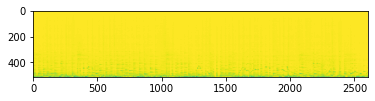

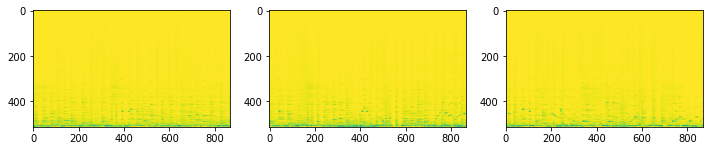

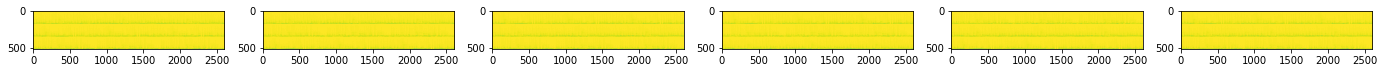

In [41]:
print(img.shape)
plt.imshow(img)

print(epochs.shape)
fig, axes = plt.subplots(1,n_epochs,figsize=(4 * n_epochs, 4))
for col in range(n_epochs):
  axes[col].imshow(epochs[col])


pshape = permutated.shape
print(pshape)
fig, axes = plt.subplots(1,pshape[0],figsize=(4 * pshape[0], 4))
for col in range(pshape[0]):
  axes[col].imshow(permutated[col])
